# 2. Introduction of PyTorch

In [1]:
# Import required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [2]:
# Set default font size
plt.rcParams['font.size'] = 14

# Set default graph size
plt.rcParams['figure.figsize'] = (6,6)

# Show grid
plt.rcParams['axes.grid'] = True

## 2.2 Tensor

### Import library

In [3]:
# Pytorch library
import torch

### Create tensors of various ranks

In [4]:
# Rank 0 tensor (scalar)
# Don't be forget to convert from dtype to float32. 
# If you forgot this about NumPy variable, dtype will be converted to float64, and some Libraries doesn't work it. 
r0 = torch.tensor(1.0).float()

# Show type
print(type(r0))

# Show dtype
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [5]:
# Show shape
print(r0.shape)

# Show data
print(r0.data)

torch.Size([])
tensor(1.)


In [7]:
# Rank 1 tensor (vector)

# Create rank 1 NumPy variable
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# Convert from NumPy to tensor
r1 = torch.tensor(r1_np).float()

# Show dtype
print(r1.dtype)

# Show shape
print(r1.shape)

# Show data
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [8]:
# Rank 2 tensor (matrix)

# Create rank 2 Numpy variable
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# Convert from NumPy to tensor
r2 = torch.tensor(r2_np).float()

# Show shape
print(r2.shape)

# Show data
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [9]:
# Rank 3 tensor

# Initialize a random seed
torch.manual_seed(123)

# Create a normal distributed variable tensor with shape=[3, 2, 2]
# Function randn sets normal distributeed random numbers (average:0, variance:1) to elements
r3 = torch.randn((3, 2, 2))

# Show shape
print(r3.shape)

# Show data
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [10]:
# Rank 4 tensor

# Create tensor with shape=[2, 3, 2, 2] and all elements of it are 1
# function ones sets 1.0 to all elements
r4 = torch.ones((2, 3, 2, 2))

# Show shape
print(r4.shape)

# Show data
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


### Create tensor of integer

In [12]:
# r1 is a rank 1 tensor that has float32 data
# This tensor is converted torch.int64 by long function 
r5 = r1.long()

# Show dtype
print(r5.dtype)

# Show value
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


### view function

In [13]:
# How to convert other rank like reshape of NumPy
# Convert to rank 2 from rank 3 
# Set -1 to only an element, then it will be automatically tuned.
r6 = r3.view(3, -1)

# Show shape
# In this case, the number of r3 elements is 12 ([3, 2, 2]:3*2*2=12)
# And the number of r6 elements will be tuned to match 12, so r6.shape will be [3, 4]([3, x]:3*x=12)
print(r6.shape)

# Show data
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [14]:
# How to convert other rank like reshape of NumPy
# Convert to rank 1 from rank 3 
# Set -1 to only an element, then it will be automatically tuned.
r7 = r3.view(-1)

# Show shape
# In this case, the number of r3 elements is 12 ([3, 2, 2]:3*2*2=12)
# And the number of r6 elements will be tuned to match 12, so r7.shape will be [12]([12]:x=12)
print(r7.shape)

# Show data
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### Other attriburtes


In [15]:
# Requires_grad
print('requires_grad: ', r1.requires_grad)

# device
print('device: ', r1.device)

requires_grad:  False
device:  cpu


### item function

In [16]:
# item function can get value of class with scaler tensor (rank 0)

item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [17]:
# Be careful with item function. It can only use rank 0 tensor.

print(r1.item())

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

In [19]:
# When the number of elements is only one, it's OK to use rank more than 1 tensor.
# example: shape is [1], or [1, 1]
t1 = torch.ones(1)

# show shape
print(t1.shape)

# call item function
print(t1.item())

torch.Size([1])
1.0


### max function

In [21]:
# Show original tensor r2 (shape is [2, 3])
print(r2)

# Call max function without argument, and it will be able to get a maximum value from all elements
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [25]:
# torch.max function
# Second augument means which axis do you want to select
# The case of rank 2 : axis=1 is row, axis=0 is column
print(torch.max(r2, 1))
print(torch.max(r2, 0))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))
torch.return_types.max(
values=tensor([4., 5., 6.]),
indices=tensor([1, 0, 0]))


In [27]:
# You can find out which order takes the maximum value by showing indices.
# You can get only indices with putting [1] to "print(torch.max(r2, 1))"
# The following calculation is a pattern that is often used when obtaining predicted labels in multi-level classification. 
print(torch.max(r2, 1)[1])

tensor([2, 0])


### Convert to NumPy variable

In following example, the tensor variable and the NumPy array are pointed same data, so use .copy() if you need.

(More details are explained in 1.2)

In [28]:
# Convert to NumPy
r2_np = r2.data.numpy()

# Show type
print(type(r2_np))

# Show value
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.4 Gradient calculation of quadratic function

### (1) The definition of variable for gradient calculation

In [29]:
# Define x with NumPy array
x_np = np.arange(-2, 2.1, 0.25)

# Show the value of x
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [30]:
# (1) The definition of cariable for gradient calculation

# Set requires_grad = True
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)

# Show result
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


About "dtype=torch.float32"

Here we are specifying a dtype parameter instead of calling the float function.

This is because when the float function is called, the copy function is called as a computation graph, and x is no longer a leaf node that can calculate the gradient value.

In normal machine learning, the parameters are differentiated instead of x, so this is only supported this time.

### (2) Calculate with tensor variables

In [32]:
# Calculate quadratic function
# Computation graph is automatically generated
y = 2 * x**2 +2

# Show the result of calculation of y
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


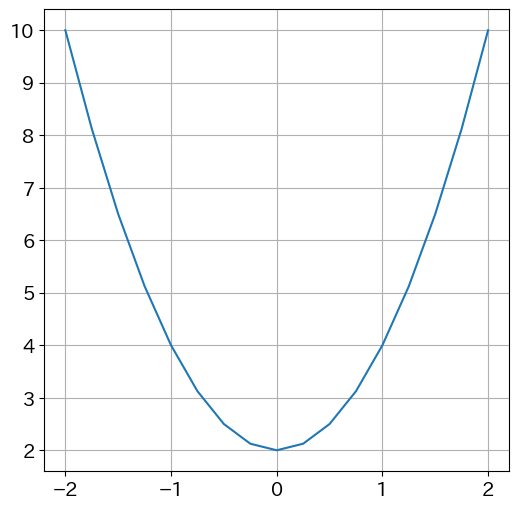

In [33]:
# Show Scatter plot

plt.plot(x.data, y.data)
plt.show()

In [34]:
# For gradient calculation, convert function value of rank 1 tensor to scalar with sum function
# (You can get the result of defferentiation of the original function, 
# because result of partial differentiation of the sum function with respect to each element is 1)
# (For details, refer to the explanation on the support site)

z = y.sum()

### (3) Visualization of computational graphs

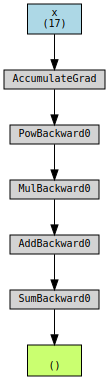

In [35]:
# (3) Visualization of computational graphs

# import required library
from torchviz import make_dot

# Call the visualization function
g = make_dot(z, params={'x': x})
display(g)

x: Leaf node. Variables for which gradient values ​​can be calculated. (17) is shape and it means rank 1 and 17 dimensions.

AccumulateGrad: This is where to store gradient values.
 
PowBackword0: Call exponential function (x**2)

MulBackword0: Call multiplication function (2 * x**2)

AddBackword0: Call add function (2 * x**2 + 2)

SumBackword0: Call sum function (create scalar z from y)

(): Output. () is shape and it means rank 0 and scalar 

### (4) Gradient calculation

In [36]:
# (4) Gradient calculation

z.backward()

### (5) Get the gradient value

In [37]:
# (5) Get gradient values
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


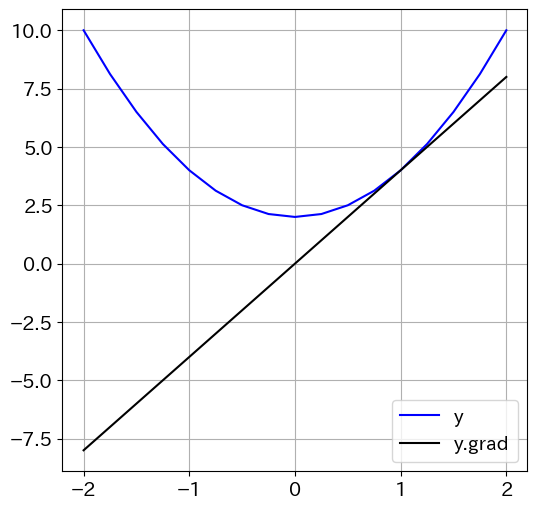

In [38]:
# Show graph of the original function and gradient

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

### (6) Initialize gradient values

In [40]:
# This is bad example because x.grad keeps results so far
# Second gradient computation without gradient initialization

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# Show gradient of x
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [41]:
# (6) Initialize gradient values with zero_() function

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5 Gradient calculation of sigmoid function